In [1]:
from evaluator import JerseyEvaluator, JerseyDetEvaluator
from model import JerseyModel, ResNetJersey
import numpy as np
import matplotlib.pyplot as plt

In [4]:
evaluator = JerseyEvaluator('./data/jersey_crops_val.txt', 32)


model = JerseyModel(inter_size=5)
model.restore('./work_dirs/basic_newdata_trash_32/model-428507.pth')
model.cuda()

best_accuracy = 0
accuracy = evaluator.evaluate(model)
print('==> accuracy = %f, best accuracy %f' % (accuracy, best_accuracy))

Number of samples is  8804
Length accuracy  0.9751249432076329
Accuracy by first number:  {0: [382, 426], 1: [2411, 2583], 2: [1913, 1984], 3: [1631, 1725], 4: [424, 464], 5: [1568, 1619], 6: [0, 0], 7: [0, 3], 8: [0, 0], 9: [0, 0], 10: [0, 0]}
Accuracy by second number:  {0: [692, 786], 1: [589, 633], 2: [390, 445], 3: [759, 810], 4: [408, 422], 5: [903, 976], 6: [0, 0], 7: [0, 2], 8: [0, 0], 9: [0, 28], 10: [4653, 4702]}
Accuracy by first number:  {0: 0.8967136150234741, 1: 0.9334107626790553, 2: 0.9642137096774194, 3: 0.9455072463768116, 4: 0.9137931034482759, 5: 0.9684990735021618, 7: 0.0}
Accuracy by second number:  {0: 0.8804071246819338, 1: 0.9304897314375987, 2: 0.8764044943820225, 3: 0.937037037037037, 4: 0.966824644549763, 5: 0.9252049180327869, 7: 0.0, 9: 0.0, 10: 0.9895789025946405}
==> accuracy = 0.915947, best accuracy 0.000000


### Balance between single numbers and two numbers

In [10]:
l1, l2, s = 0, 0, 0
for batch_idx, (images, length_labels, digits_labels) in enumerate(evaluator._loader):
    for l in length_labels:
        s += 1
        if l==1:
            l1+=1
        elif l==2:
            l2 += 1
print('l1: ', l1/s, ', l2: ', l2/s)

l1:  0.5340754202635166 , l2:  0.46592457973648344


In [38]:
cv2.imread('./data/jersey_crops/2018-11-28_Virginia_at_Maryland/010959_10_0.jpg').shape


(24, 14, 3)

In [24]:
answer = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}

In [13]:
for dl in digits_labels[0]:
    if dl

tensor([2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2,
        1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
        1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
        2, 1, 2, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


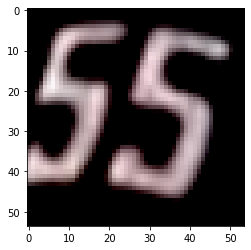

In [23]:
idx = 1
img = images[idx].permute(1,2,0).numpy()
plt.imshow(img)

### Get some random crops and save to Trash dir

In [15]:
import glob
import os
import cv2
import random

inp_dirs = glob.glob('../yolo_jersey_region/data/player_crops/*')
output_dir = './data/trash'
print(len(inp_dirs))

idx = 0
avg_w, avg_h = 0, 0
outputs = []
for inp_dir in inp_dirs:
    curr_imgs = glob.glob(os.path.join(inp_dir, '*.jpg'))
    if len(curr_imgs)>=50:
        curr_sample = random.sample(curr_imgs, 50)
    elif len(curr_imgs)>=40:
        curr_sample = random.sample(curr_imgs, 40)
    for img_path in curr_sample:
        img = cv2.imread(img_path)
        
        h,w,c = img.shape
        avg_w += w
        avg_h += h
        
        
        rand_w = random.randint(13, 25)
        rand_h = random.randint(20, 30)
        
        rand_x = random.randint(0, w - rand_w)
        rand_y = random.randint(int(h/2), h - rand_h)
        
        crop = img[rand_y : rand_y + 54, rand_x: rand_x + 54, :]
        idx += 1
        
        outputs.append(os.path.join('/home/ubuntu/oljike/ocr_jersey/JerseyClassifier/data/trash', 'trash_' + str(idx) + '_None.jpg'))     
        cv2.imwrite(os.path.join(output_dir, 'trash_' + str(idx) + '_None.jpg'), crop)
        
print("number of new images ", len(glob.glob(output_dir + '/*.jpg')))

76
number of new images  3790


### Check model outputs for trash images

In [16]:
from torchvision import transforms
from PIL import Image
from matplotlib import cm
def to_pil(arr):
    return Image.fromarray(arr.astype('uint8'), 'RGB')


transform = transforms.Compose([
#     transforms.CenterCrop([32, 54]),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

False positive accuracy  0.9857519788918205
False positive accuracy  0.9857519788918205
tensor([0], device='cuda:0') tensor([10], device='cuda:0') tensor([10], device='cuda:0')


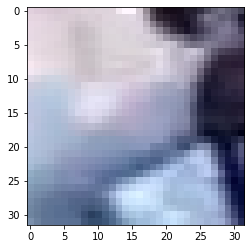

In [18]:
num_incor = 0
num_cor = 0

input_imgs = glob.glob('./data/trash/*jpg')

false_pos = []
for idx in range(len(input_imgs)):
    img = cv2.imread(input_imgs[idx])
    img = cv2.resize(img, (32, 32))

    tens = transform(to_pil(img)).unsqueeze(0).cuda()

    length_logits, digit1_logits, digit2_logits = model.eval()(tens)

    length_prediction = length_logits.max(1)[1]
    digit1_prediction = digit1_logits.max(1)[1]
    digit2_prediction = digit2_logits.max(1)[1]
    
    
    
    if length_prediction.cpu().item() != 0:
        num_incor += 1
        false_pos.append((img, digit1_prediction, digit2_prediction))
    elif length_prediction.cpu().item() == 0:
        num_cor += 1

print("False positive accuracy ", 1 - num_incor / len(input_imgs))
print("False positive accuracy ", num_cor / len(input_imgs))
print(length_prediction, digit1_prediction, digit2_prediction)
plt.imshow(img)

tensor([3], device='cuda:0') tensor([4], device='cuda:0')


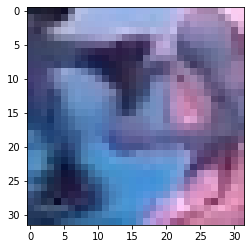

In [19]:
idx = 1
print(false_pos[idx][1], false_pos[idx][2])
plt.imshow(false_pos[idx][0])

### Add new trash images to train and val files

In [86]:
print(len(outputs))
train_trash = outputs[:int(0.8*len(outputs))]
val_trash = outputs[int(0.8*len(outputs)):]

with open('./data/jersey_crops_train.txt') as f:
    train_data = f.readlines()
    
with open('./data/jersey_crops_val.txt') as f:
    val_data = f.readlines()

2280


In [85]:
len(train_data), train_data[0], os.path.exists(outputs[0]), outputs[0]

(36160,
 '/home/ubuntu/oljike/ocr_jersey/JerseyClassifier/data/jersey_crops/2020.02.15-NotreDame_at_Duke/004419_1_10.jpg,10\n',
 True,
 '/home/ubuntu/oljike/ocr_jersey/JerseyClassifier/data/trash/trash_1_None.jpg')

In [88]:
avg_h, avg_w = 0, 0
for x in train_data:
    path = x.strip().split(',')[0]
    img = cv2.imread(path)
    h,w,c = img.shape
    
    avg_h += h
    avg_w += w
    
print(avg_h/len(train_data), avg_w/len(train_data),)

26.890032645324347 23.26824452401011


In [87]:
for meta in train_trash:
    train_data.append(meta + ',None\n')
    
for meta in val_trash:
    val_data.append(meta + ',None\n')
    
with open('./data/jersey_crops_trash_train.txt', 'w') as f:
    for x in train_data:
        f.write(x)
        
with open('./data/jersey_crops_trash_val.txt', 'w') as f:
    for x in val_data:
        f.write(x)